<h1>Elliptic Curves </h1>
an elliptic curve is a set of points that satisfy a specifc polynomial equation.
and we will work with the Weierstrass equation : $$ E_{a,b} :  y^{2} = x^{3}+ ax +b $$for some real numbers a and b where
 $$ \Delta = -16(4a^{3}+27b^{2}) \neq 0$$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

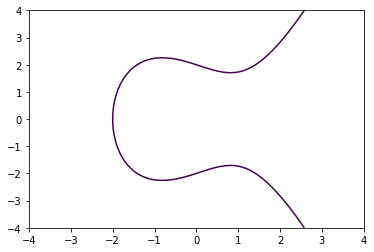

In [2]:
def E(a,b):
    y, x = np.ogrid[-4:4:100j, -4:4:100j]
   
    return pow(y, 2) - pow(x, 3) - x * a - b 
#example
a,b=-2,4
y, x = np.ogrid[-4:4:100j, -4:4:100j]
plt.contour(x.ravel(), y.ravel(),E(a,b), [0])
plt.show()

<h2>Magma</h2>
the points on the Weierstrass's ellptic curves form an  abelian group .
<h3>proprieties</h3>
let P,Q and R $ \in $ E .
<ul>
    <li>P+O=P, where O=(0,0) represents the neutral element in Weierstrass Curves</li>
    <li> P-P=O,-P is the negation point</li>
    <li> P+Q=Q+P </li>
    <li> P+(Q+R)=(P+Q)+R</li>
</ul>
and here you can find the addition formula <a href="https://www.certicom.com/content/certicom/en/21-elliptic-curve-addition-a-geometric-approach.html#:~:text=The%20addition%20of%20two%20points,is%20also%20on%20the%20curve."> here</a>.<br>
and below you find the implementation and the animation of points addition




P + Q = (1.3333333333333335, -1.9245008972987525)


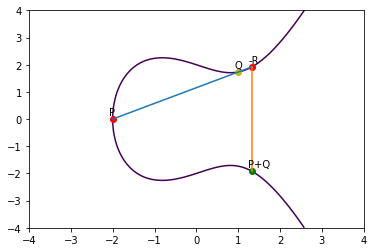

In [3]:
def add(P,Q):
    x_p,y_p=P
    x_q,y_q=Q
    if x_q==0 and y_q==0:
       return P
    elif x_p==x_q and y_p ==-y_q :
        return (0,0) 
    else:
        lam=0
        if P != Q :
           lam = (y_q - y_p)/(x_q - x_p) 
        else : 
           lam =(3*(x_p**2) + a) / (2*y_p) 
        x_r = lam**2 - x_p - x_q
        y_r = lam*(x_p - x_r) - y_p
        return (x_r, y_r)
P=(-2,0)
Q=(1,np.sqrt(3))
x_r,y_r=add(P,Q)
R,R_neg=(x_r,y_r),(x_r,-y_r)
print(f"P + Q = {R}")

#plot the points
plt.plot(*P, 'ro')
plt.annotate('P', xy=P, xytext=(-4, 4), textcoords='offset points')
plt.plot(*Q, 'yo')
plt.annotate('Q', xy=Q, xytext=(-4, 4), textcoords='offset points')
plt.plot(*R, 'go')
plt.annotate('P+Q', xy=R, xytext=(-4, 4), textcoords='offset points')
plt.plot(*R_neg, 'ro')
plt.annotate('-R', xy=R_neg, xytext=(-4, 4), textcoords='offset points')

#plot the lines
plt.plot([P[0], R_neg[0]], [P[1], R_neg[1]],)
plt.plot([R[0], R_neg[0]], [R[1], R_neg[1]],)
#plot the curve
plt.contour(x.ravel(), y.ravel(), E(a,b), [0])

<h2>The implementation </h2>

In [4]:
class EllipticCurve(object):
     def __init__(self, a, b):
        self.a = a
        self.b = b
        self.delta = -16 * (4 * a**3 + 27 * b**2)
        if not self.is_smooth():
            print(f"the curve {self} is not smooth!!")
        
     def is_smooth(self):
        return self.delta != 0
    
    
     def is_in_the_curve(self, x, y):
        return pow(y, 2) == pow(x, 3) + self.a * x + self.b
    
    
     def __str__(self):
        return (f"y^2 = x^3 + {self.a}x + {self.b}")
     def visualize_cruve(self):
          y, x = np.ogrid[-4:4:100j, -4:4:100j]
          a,b=self.a,self.b
          plt.contour(x.ravel(), y.ravel(),pow(y,2) - pow(x,3) - a * x + b, [0])
          plt.show()
        

In [20]:
class Point(object): 
    
    def __init__(self, EC, x, y):
            self.EC = EC
            self.x = x
            self.y = y
            
            if not EC.is_in_the_curve(x, y) and ( (x!=0) and (y!=0)):
                print(f"The point{self} isn't in the curve {EC}")
                 
    def neg(self):
        return Point(self.EC, self.x, -self.y)
    
    
    
    
    def add(self,p):
        if p.x==0 and p.y==0:
           return self 
        elif self.x==p.x and self.y == -p.y :
            return Point(self.EC,0,0) 
        else:
            lam=0
            if self!= p :
               lam = (p.y - self.y)/(p.x - self.x) 
            else : 
               lam =(3 * (self.x**2) + a) / (2 * self.y) 
            x_r = lam**2 - self.x - p.x
            y_r = lam*(self.x - x_r) - self.y
            return Point(self.EC,x_r, y_r)
    
    
    def sub(self, p):
        return self.add(neg(p))
    
    
    def mul(self, n):
        if not isinstance(n, int):
            raise Exception ("we can't multiply with a non integer")
        else:
            if n<0:
                return -self * -n
            if n == 0:
                return Point(self.curve, 0, 0) 
            #Double_and_Add
            else:
                Q = self
                R = self if n & 1 == 1 else Point(self.EC, 0, 0) 
                
                i = 2
                while i<=n:
                    Q = Q.add(Q)
                    if n & i == i:
                        R = Q.add(R)
                    i = i << 1
        return R
    
    def isEqual(self, p):
        if(self.EC == p.EC and self.x == p.x and self.y == p.y):
            return True
        else:
            return False
        
    def __str__(self):
        return (f"({self.x},{self.y})")
    
    
    

In [21]:

E= EllipticCurve(a = 3, b = 5)
p = Point(E, 1, 3)
q = Point(E, 1, -3)
print(f"p + q = {p.add(q)}")
print(p.add(p).isEqual(p.mul(2)))


p + q = (0,0)
The point(-1.9722222222222223,-2.5046296296296298) isn't in the curve y^2 = x^3 + 3x + 5
The point(-1.9722222222222223,-2.5046296296296298) isn't in the curve y^2 = x^3 + 3x + 5
True
